<a href="https://colab.research.google.com/github/BinaryNavigator07/Network-Intrusion-Detection-System/blob/main/NSL-KDD/NSL_KDD%20Feature_Extraction_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import RFE
np.random.seed(178)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hassan06/nslkdd")

print("Path to dataset files:", path)

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,Unnamed: 41,Unnamed: 42
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.0,1.00,neptune,19
25187,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.0,0.00,warezclient,12
25188,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
25189,0,tcp,nnsp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,20


In [ ]:
df = df.rename(columns={'Unnamed: 41': 'Outcome', 'Unnamed: 42': 'Label'})
df

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,Outcome,Label
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.0,1.00,neptune,19
25187,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.0,0.00,warezclient,12
25188,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
25189,0,tcp,nnsp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Duration                     25191 non-null  int64  
 1   Protocol_type                25191 non-null  object 
 2   Service                      25191 non-null  object 
 3   Flag                         25191 non-null  object 
 4   Src_bytes                    25191 non-null  int64  
 5   Dst_bytes                    25191 non-null  int64  
 6   Land                         25191 non-null  int64  
 7   Wrong_fragment               25191 non-null  int64  
 8   Urgent                       25191 non-null  int64  
 9   Hot                          25191 non-null  int64  
 10  Num_failed_logins            25191 non-null  int64  
 11  Logged_in                    25191 non-null  int64  
 12  Num_compromised              25191 non-null  int64  
 13  Root_shell      

In [ ]:
df.columns

Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
       'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
       'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell',
       'Su_attempted', 'Num_root', 'Num_file_creations', 'Num_shells',
       'Num_access_files', 'Num_outbound_cmds', 'Is_hot_login',
       'Is_guest_login', 'Count', 'Srv_count', 'Serror_rate',
       'Srv_serror_rate', 'Rerror_rate', 'Srv_rerror_rate', 'Same_srv_rate',
       'Diff_srv_rate', 'Srv_diff_host_rate', 'Dst_host_count',
       'Dst_host_srv_count', 'Dst_host_same_srv_rate',
       'Dst_host_diff_srv_rate', 'Dst_host_same_src_port_rate',
       'Dst_host_srv_diff_host_rate', 'Dst_host_serror_rate',
       'Dst_host_srv_serror_rate', 'Dst_host_rerror_rate',
       'Dst_host_srv_rerror_rate', 'Outcome', 'Label'],
      dtype='object')

In [ ]:
df.describe()

,Duration,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,Label
count,25191.000000,2.519100e+04,2.519100e+04,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.0,25191.0,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000
mean,305.066214,2.433157e+04,3.491986e+03,0.000079,0.023739,0.000040,0.198047,0.001191,0.394784,0.227859,0.001548,0.001350,0.249851,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.594458,27.699774,0.286349,0.283774,0.118635,0.120265,0.660545,0.062366,0.095935,182.533365,115.066611,0.519805,0.082541,0.147452,0.031846,0.285812,0.279857,0.117803,0.118774,19.487674
std,2686.608278,2.410853e+06,8.883248e+04,0.008910,0.260226,0.006301,2.154244,0.045419,0.488814,10.417559,0.039317,0.048786,11.501070,0.529613,0.018899,0.098526,0.0,0.0,0.095117,114.674546,72.469500,0.447318,0.447604,0.318751,0.322341,0.439641,0.178553,0.256587,98.995648,110.647591,0.448947,0.187195,0.308373,0.110577,0.445322,0.446081,0.305875,0.317339,2.328585
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.790000e+02,5.305000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.000000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df['Outcome'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy'], dtype=object)

In [ ]:
df.loc[df['Outcome'] == "normal", "Outcome"] = 'normal'
df.loc[df['Outcome'] != 'normal', "Outcome"] = 'attack'

In [ ]:
df

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,Outcome,Label
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,attack,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,attack,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.0,1.00,attack,19
25187,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.0,0.00,attack,12
25188,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,attack,21
25189,0,tcp,nnsp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.00,attack,20


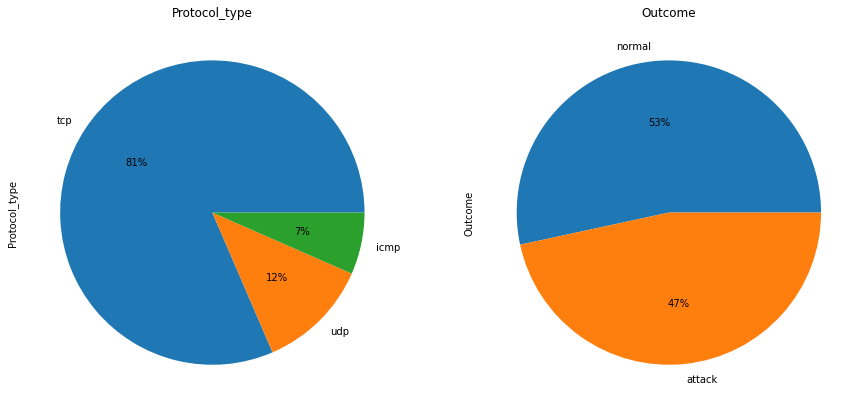

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

pie_plot(df, ['Protocol_type', 'Outcome'], 1, 2)

### Preprocessing the data

In [ ]:
## MinMaxScaling

columns = ['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
       'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
       'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell',
       'Su_attempted', 'Num_root', 'Num_file_creations', 'Num_shells',
       'Num_access_files', 'Num_outbound_cmds', 'Is_hot_login',
       'Is_guest_login', 'Count', 'Srv_count', 'Serror_rate',
       'Srv_serror_rate', 'Rerror_rate', 'Srv_rerror_rate', 'Same_srv_rate',
       'Diff_srv_rate', 'Srv_diff_host_rate', 'Dst_host_count',
       'Dst_host_srv_count', 'Dst_host_same_srv_rate',
       'Dst_host_diff_srv_rate', 'Dst_host_same_src_port_rate',
       'Dst_host_srv_diff_host_rate', 'Dst_host_serror_rate',
       'Dst_host_srv_serror_rate', 'Dst_host_rerror_rate',
       'Dst_host_srv_rerror_rate', 'Outcome', 'Label']

def Scaling(df_num, cols):
    std_scaler = MinMaxScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

cat_cols = ['Is_hot_login','Protocol_type','Service','Flag','Land', 'Logged_in','Is_guest_login', 'Label', 'Outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['Outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['Outcome'] != 0, "outcome"] = 1

    ## One-Hot Encoding
    dataframe = pd.get_dummies(dataframe, columns = ['Protocol_type', 'Service', 'Flag'])
    return dataframe


In [ ]:
scaled_train = preprocess(df)

In [ ]:
scaled_train

,Land,Logged_in,Is_hot_login,Is_guest_login,Outcome,Label,Duration,Src_bytes,Dst_bytes,Wrong_fragment,Urgent,Hot,Num_failed_logins,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,outcome,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,Service_IRC,Service_X11,Service_Z39_50,Service_auth,Service_bgp,Service_courier,Service_csnet_ns,Service_ctf,Service_daytime,Service_discard,Service_domain,Service_domain_u,Service_echo,Service_eco_i,Service_ecr_i,Service_efs,Service_exec,Service_finger,Service_ftp,Service_ftp_data,Service_gopher,Service_hostnames,Service_http,Service_http_443,Service_http_8001,Service_imap4,Service_iso_tsap,Service_klogin,Service_kshell,Service_ldap,Service_link,Service_login,Service_mtp,Service_name,Service_netbios_dgm,Service_netbios_ns,Service_netbios_ssn,Service_netstat,Service_nnsp,Service_nntp,Service_ntp_u,Service_other,Service_pm_dump,Service_pop_2,Service_pop_3,Service_printer,Service_private,Service_red_i,Service_remote_job,Service_rje,Service_shell,Service_smtp,Service_sql_net,Service_ssh,Service_sunrpc,Service_supdup,Service_systat,Service_telnet,Service_tim_i,Service_time,Service_urh_i,Service_urp_i,Service_uucp,Service_uucp_path,Service_vmnet,Service_whois,Flag_OTH,Flag_REJ,Flag_RSTO,Flag_RSTOS0,Flag_RSTR,Flag_S0,Flag_S1,Flag_S2,Flag_S3,Flag_SF,Flag_SH
0,0,0,0,0,normal,15,0.0,3.824902e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023529,0.000000,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,attack,19,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239216,0.009804,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,normal,21,0.0,6.077927e-07,0.001583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,0.007843,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,normal,21,0.0,5.213394e-07,0.000082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056863,0.060784,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,attack,21,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.035294,0.0,0.0,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
x = scaled_train.drop(['Outcome', 'Label'] , axis = 1)
y = scaled_train['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Feature Extraction using Random Forest

In [ ]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()

X_train.columns

features = X_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

Index(['Logged_in', 'Src_bytes', 'Dst_bytes', 'Count', 'Srv_count',
       'Serror_rate', 'Srv_serror_rate', 'Rerror_rate', 'Srv_rerror_rate',
       'Same_srv_rate', 'Diff_srv_rate', 'Srv_diff_host_rate',
       'Dst_host_count', 'Dst_host_srv_count', 'Dst_host_same_srv_rate',
       'Dst_host_diff_srv_rate', 'Dst_host_same_src_port_rate',
       'Dst_host_srv_diff_host_rate', 'Dst_host_serror_rate',
       'Dst_host_srv_serror_rate', 'Dst_host_rerror_rate',
       'Dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'Protocol_type_tcp',
       'Service_domain_u', 'Service_eco_i', 'Service_ecr_i', 'Service_http',
       'Service_private', 'Flag_S0', 'Flag_SF'],
      dtype='object')
31
[3.16326560e-05 4.97632606e-02 0.00000000e+00 8.96557922e-04
 3.81143439e-03 1.85033987e-02 9.41088032e-02 3.08418941e-03
 0.00000000e+00 8.27546401e-03 1.41662584e-04 5.23256390e-03
 2.20659413e-04 3.63291775e-05 3.44082487e-04 1.57591315e-04
 3.29796944e-05 1.30538299e-04 0.00000000e+00 4.84630634e-02
 1

In [ ]:
X_train_rfc = sel.transform(X_train)
X_test_rfc = sel.transform(X_test)

### Random Forest with Feature Extraction

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,f1_score,precision_score,recall_score
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, Y_pred))
    print('Precision: ', precision_score(y_test, Y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, Y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, Y_pred, average='weighted'))

In [ ]:
run_randomForest(X_train_rfc, X_test_rfc, y_train, y_test)

Accuracy:  0.9960309585235165
Precision:  0.9960375417132734
Recall:  0.9960309585235165
F1 score:  0.9960302990093125


### Decision Tree with Feature Extraction

In [ ]:
def run_DecisionTree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, Y_pred))
    print('Precision: ', precision_score(y_test, Y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, Y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, Y_pred, average='weighted'))

In [ ]:
run_DecisionTree(X_train_rfc, X_test_rfc, y_train, y_test)

Accuracy:  0.991863464973209
Precision:  0.991863806810332
Recall:  0.991863464973209
F1 score:  0.9918635965767288


### XG-Boost with Feature Extraction

In [ ]:
def run_XGBoost(X_train, X_test, y_train, y_test):
    clf = xgb.XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, Y_pred))
    print('Precision: ', precision_score(y_test, Y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, Y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, Y_pred, average='weighted'))

In [ ]:
run_DecisionTree(X_train_rfc, X_test_rfc, y_train, y_test)

Accuracy:  0.991863464973209
Precision:  0.991863806810332
Recall:  0.991863464973209
F1 score:  0.9918635965767288


### Cat-Boost with Feature Extraction

In [ ]:
from catboost import CatBoostClassifier
def run_catBoost(X_train, X_test, y_train, y_test):
    clf = CatBoostClassifier(iterations=100, random_state=0, verbose=0)
    clf.fit(X_train, y_train, cat_features=[], verbose=0)
    y_pred = clf.predict(X_test)

    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))

run_catBoost(X_train_rfc, X_test_rfc, y_train, y_test)

Accuracy:  0.9976185751141099
Precision:  0.9976195290326453
Recall:  0.9976185751141099
F1 score:  0.9976184191281695


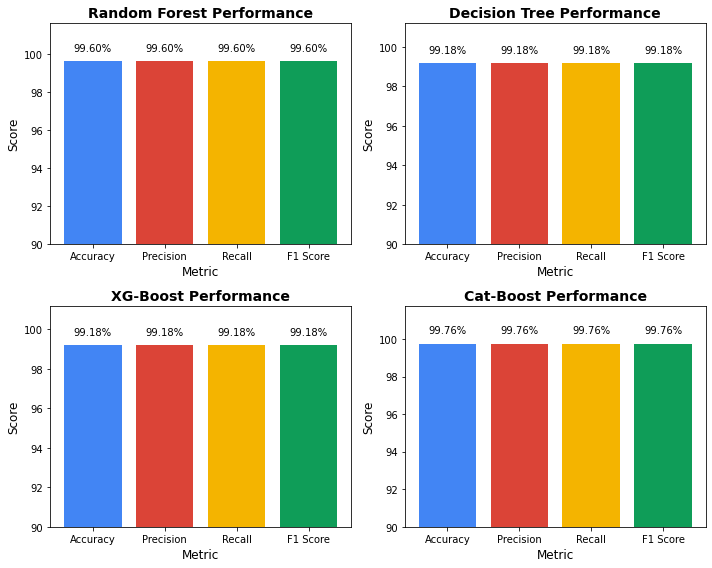

In [ ]:
models = ['Random Forest', 'Decision Tree', 'XG-Boost', 'Cat-Boost']
random_forest = [99.60, 99.60, 99.60, 99.60]
decision_tree = [99.18, 99.18, 99.18, 99.18]
xgboost = [99.18, 99.18, 99.18, 99.18]
catboost = [99.76, 99.76, 99.76, 99.76]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [random_forest, decision_tree, xgboost, catboost]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (model, ax) in enumerate(zip(models, axs)):
    max_value = max(values[i]) + 2
    ax.bar(metrics, values[i], color=['#4285F4', '#DB4437', '#F4B400', '#0F9D58'])
    ax.set_title(f'{model} Performance', fontsize=14, fontweight='bold')
    ax.set_ylim(90, max_value)


    for j, v in enumerate(values[i]):
        ax.annotate(f'{v:.2f}%', xy=(j, v), xytext=(0, 8),
                    textcoords="offset points", ha='center', va='bottom', fontsize=10)

    ax.set_xlabel('Metric', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)

plt.tight_layout()
plt.show()